# Learning Theory Homework 
***
**Name**: Ahmed Al Hasani 
***

This assignment is due on Moodle by **5pm on Friday March 9th**. Submit only this Jupyter notebook to Moodle. Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI5622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy)



## Overview 
***

In this assignment you will explore the concepts of PAC learnability and VC dimension. 


### [15 points] Problem 1: 
***

Consider the class C of concepts defined by triangles with **distinct** vertices of the form $(i, j)$ where $i$ and $j$ are integers in the interval $[0,99]$. A concept c labels points on the interior and boundary of the associated triangle as positive and points exterior to the triangle as negative.

**Note**: To make life easier, we'll allow degenerate triangles in $C$. That is, triangles where the vertices are collinear. The following image depicts an example of a nondegenerate and a degenerate triangle.

<img src="figs/triangles.png" width=400 height=50>  

**Part A**: Suppose we have an algorithm that produces a consistent $h$ from the hypothesis class $H = C$. Give a bound on the number of training examples sufficient to assure that for any target concept $c$ in $C$, our algorithm will, with probability $1-\delta$, output a hypothesis $h$ with generalization error at most $\epsilon$.

**Answer Part A: **First, we need to determine which class of $H$ is appropriate for this problem. Because we are dealing with triangluar hypotheses that have distinct vertices of the form $(i, j)$ where $i$ and $j$ are integers in the interval $[0,99]$, that can classify without any errors whether a point is positive or negative depending if they are inside or on the boundaries of a hypothesis, then we can conclude that $H$ is finite and consistent. 

Therefore, the bound on the number of training examples **m** is the following: 

$$
m \geq \frac{1}{\epsilon}\left(\ln\left| H \right| + \ln\frac{1}{\delta} \right)
$$

**Part B**: Based on your bound in **Part A**, determine the minimum number of training examples necessary such that for any target concept $c$ in $C$, our algorithm will, with probability $0.95$, output a hypothesis $h$ with generalization error at most $0.15$.  

**Answer Part B: ** First, we need to determine the size of H, which is equal to the number of triangles we can create. The total number of points is 100 x 100 = 10,000 and because our vertices can span a space of $x$ and $y$ in the interval of $[0,99]$, and because triangles have only 3 vertices, the total number of triangles can be found by computing the combinations demonstrated by $\binom{10000}{3} $, which results in $166616670000$ triangles. A $0.95$ probability means $\delta$ is equal to $0.05$ and a generalization error at most of $0.15$ means $\epsilon$ is equal to $0.15$.

Computing the number of training examples then is determined by:

$$
m \geq \frac{1}{0.15}\left(\ln\left| 166616670000 \right| + \ln\frac{1}{0.05} \right)
$$
Which turns to:

$$
m \geq 192.23.
$$

Hence m must be atleast **193** training examples.

### [15 points] Problem 2: 
***

Consider feature vectors that live in two-dimensional space and the class of hypotheses defined by circles **centered at the origin**. There are two different kinds of hypotheses $h$ in this class. One type of hypthesis classifies points as positive if they lie on the boundary or **interior** of the circle, and negative otherwise. The other type of hypothesis classifies points as positive if they lie on the boundary or **exterior** of the circle, and negative otherwise. State and prove (rigorously) the VC dimension of this family of classifiers.

### Non-Rigorous Lower Bound: 
First, I will explore whether the family of hypotheses can shatter two points. The 4 plots below will explore shattering 2 points.

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
mycolors = {"blue":"steelblue", "red":"#a76c6e",  "green":"#6a9373", "smoke":"#f2f2f2"}

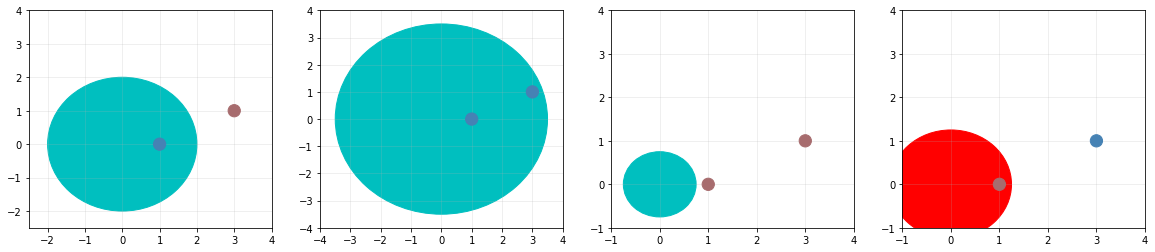

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
axes[0].add_patch(plt.Circle((0, 0), 2, color='c'))
axes[0].set_xlim([-2.5, 4]); axes[0].set_ylim([-2.5, 4]); axes[0].grid(alpha=0.25)
axes[0].scatter([1,3], [0,1], color=[mycolors["blue"], mycolors["red"]], s=150, zorder=2)
axes[1].add_patch(plt.Circle((0, 0), 3.5, color='c'))
axes[1].set_xlim([-4, 4]); axes[1].set_ylim([-4, 4]); axes[1].grid(alpha=0.25)
axes[1].scatter([1,3], [0,1], color=[mycolors["blue"], mycolors["blue"]], s=150, zorder=2)
axes[2].add_patch(plt.Circle((0, 0), 0.75, color='c'))
axes[2].set_xlim([-1, 4]); axes[2].set_ylim([-1, 4]); axes[2].grid(alpha=0.25)
axes[2].scatter([1,3], [0,1], color=[mycolors["red"], mycolors["red"]], s=150, zorder=2)
axes[3].add_patch(plt.Circle((0, 0), 1.25, color='r'))
axes[3].set_xlim([-1, 4]); axes[3].set_ylim([-1, 4]); axes[3].grid(alpha=0.25)
axes[3].scatter([1,3], [0,1], color=[mycolors["red"], mycolors["blue"]], s=150, zorder=2)
plt.show()

Our hypotheses can shatter two points. What about three points?
###  Non-Rigorous Upper Bound Bound:


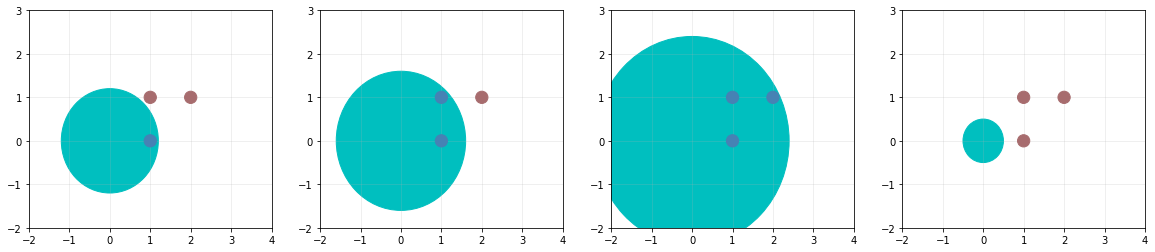

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
axes[0].add_patch(plt.Circle((0, 0), 1.2, color='c'))
axes[0].set_xlim([-2, 4]); axes[0].set_ylim([-2, 3]); axes[0].grid(alpha=0.25)
axes[0].scatter([1,2,1], [0,1,1], color=[mycolors["blue"], mycolors["red"], mycolors["red"]], s=150, zorder=2)
axes[1].add_patch(plt.Circle((0, 0), 1.6, color='c'))
axes[1].set_xlim([-2, 4]); axes[1].set_ylim([-2, 3]); axes[1].grid(alpha=0.25)
axes[1].scatter([1,2,1], [0,1,1], color=[mycolors["blue"], mycolors["red"], mycolors["blue"]], s=150, zorder=2)
axes[2].add_patch(plt.Circle((0, 0), 2.4, color='c'))
axes[2].set_xlim([-2, 4]); axes[2].set_ylim([-2, 3]); axes[2].grid(alpha=0.25)
axes[2].scatter([1,2,1], [0,1,1], color=[mycolors["blue"], mycolors["blue"], mycolors["blue"]], s=150, zorder=2)
axes[3].add_patch(plt.Circle((0, 0), 0.5, color='c'))
axes[3].set_xlim([-2, 4]); axes[3].set_ylim([-2, 3]); axes[3].grid(alpha=0.25)
axes[3].scatter([1,2,1], [0,1,1], color=[mycolors["red"], mycolors["red"], mycolors["red"]], s=150, zorder=2)
plt.show()

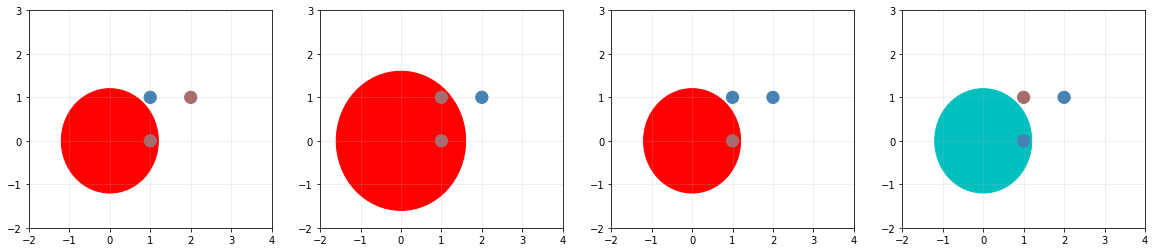

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
axes[0].add_patch(plt.Circle((0, 0), 1.2, color='r'))
axes[0].set_xlim([-2, 4]); axes[0].set_ylim([-2, 3]); axes[0].grid(alpha=0.25)
axes[0].scatter([1,1,2], [0,1,1], color=[mycolors["red"], mycolors["blue"], mycolors["red"]], s=150, zorder=2)
axes[1].add_patch(plt.Circle((0, 0), 1.6, color='r'))
axes[1].set_xlim([-2, 4]); axes[1].set_ylim([-2, 3]); axes[1].grid(alpha=0.25)
axes[1].scatter([1,1,2], [0,1,1], color=[mycolors["red"], mycolors["red"], mycolors["blue"]], s=150, zorder=2)
axes[2].add_patch(plt.Circle((0, 0), 1.2, color='r'))
axes[2].set_xlim([-2, 4]); axes[2].set_ylim([-2, 3]); axes[2].grid(alpha=0.25)
axes[2].scatter([1,1,2], [0,1,1], color=[mycolors["red"], mycolors["blue"], mycolors["blue"]], s=150, zorder=2)
axes[3].add_patch(plt.Circle((0, 0), 1.2, color='c'))
axes[3].set_xlim([-2, 4]); axes[3].set_ylim([-2, 3]); axes[3].grid(alpha=0.25)
axes[3].scatter([1,1,2], [0,1,1], color=[mycolors["blue"], mycolors["red"], mycolors["blue"]], s=150, zorder=2)
plt.show()

As can be seen above, the first plot and the last plot show that we can't shatter 3 points because we fail to label the points correctly in two dichotomies. 

### VCDim Rigorous Proof:
As can be seen, the class of hypotheses cannot shatter a feature vector with 3 points. To prove this in a rigorous manner, if we have three arbitrary $x1 , x2 , x3$ points, such that their locations are denoted by their polar coordinates and $r1\leq r2 \leq r3 $. Let $y$ = $(+1, -1, +1)$.

First, lets use the circle hypothesis that labels points inside or on the boundaries as positive, and points outside the circle as negative. ${\bf r}_a$ will denotes this circle's radius.

Since $y1 = +1$ it must be the case that $r1 \leq {\bf r}_a$.

Since $y2 = -1$ it must be the case that $r2 \geq {\bf r}_a$

Since $y3 = +1$ it must be the case that $r3 \leq {\bf r}_a$.

But that is not possible because $r1\leq r2 \leq r3$

Hence $y3 = +1$ is a contradiction.

What if we try the circle that classifies the interior as negative points? Let  ${\bf r}_b$ denote this circle's radius.

Since $y2 = -1$ it must be the case that $r2 \geq {\bf r}_b$

Since $y1 = +1$ it must be the case that $r1 \leq {\bf r}_b$.

But that is not possible because $r1\leq r2 \leq r3$

Hence $y1 = +1$ is a contradiction.

Hence, three points cannot be captured by $H$.

Second, lets prove if $H$ can shatter two points.

If we have $x1 , x2$ , their locations in polar coordinates will have a radius and a angle denoted in theta. Their respective radii are denoted by $r1, r2$, where $r1\leq r2$. Let $y$ = $(+1, -1)$.

Lets use the circle hypothesis that labels points inside or on the boundaries as positive, and points outside the circle as negative. ${\bf r}_a$ will denotes this circle's radius.

Since $y1 = +1$ it must be the case that $r1 \leq {\bf r}_a$.

Since $y2 = -1$ it must be the case that $r2 \geq {\bf r}_a$

Both conditions do not contradict our initial conditions, so it must be the case that $H$ can shatter two points.

Hence, VCDim = 2.

### [20 points] Problem 3: Empirical Verification of PAC Bounds for Axis-Aligned Rectangles 
***

In the in-class notebook associated with PAC Learnability, we proved a PAC bound for the class of concepts $C$ comprised of axis-aligned rectangles living in $\mathbb{R}^2$ of the form $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers. Specifically, we proved that with probability $1-\delta$, any consistent learner could learn a hypothesis $h$ in $H = C$ with generalization error less than $\epsilon$ provided that the number of training examples satisfied 

$$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$

In this problem you will empirically verify this bound for the restricted concept class $C$ where the rectangles are defined by $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers satisfying $0 \leq a \leq b \leq 100$ and $0 \leq c \leq d \leq 100$. 

**Part A**: The following is a general outline of how you should accomplish this, but it is up to you how you organize your code. 

- Write some code that randomly generates a concept rectangle $c$. 



- Write some code that, given feature vectors of length-2, labels them according to some rectangle (that is, labels a point positive if the point is on the boundary or interior of the rectangle, and negative otherwise).  



- Write some code that, given training examples of length-2, and labeled according to a concept $c$, returns a consistent hypothesis rectangle $h$. 



- Write some code that generates a training set of size $m$, labels them according to a random concept $c$, learns a consistent hypothesis $h$, and then approximates the generalization error by predicting on $1000$ new examples from the same distribution as the training data. 


- Write some code that computes approximate generalization errors for $100$ independent concepts $c$ and associated training sets of size $m$, and returns the worst-case generalization error at the confidence level $1-\delta$.  One way to do this in the case that say $\delta = 0.05$, is to report the $95^\textrm{th}$ percentile of the $100$ samples of the generalization error. We can then say that, in our simulation, $100(1-\delta)\%$ of our observed generalization errors were less than our computed value. (**Bonus**: If your code is efficient, try increasing the number of runs in the simulation to $500$. This should give you a better approximation of the generalization error.) 

In [15]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
#%matplotlib inline

In [85]:
class theory:
    def __init__(self, m):
        self.labels = []
        self.labels2 = []
        self.predict = []
        self.training = []
        self.test = []
        self.h_graph_xcoordinates = []
        self.h_graph_ycoordinates = []
        self.m = m # this is m
        self.lims = (0, 101)

    def draw(self):
        starting_x = random.uniform(0.0,100.0) #uniform distribution
        starting_y = random.uniform(0.0,100.0) #uniform distribution
        
        width = random.uniform(0.0,100.0-starting_x) #uniform distribution
        height = random.uniform(0.0,100.0-starting_y) #uniform distribution
        
        fig1 = plt.figure(figsize=(10, 100))
        ax1 = fig1.add_subplot(111, aspect='equal')
        ax1.add_patch(patches.Rectangle((starting_x, starting_y), width, height))
        plt.ylim(self.lims)
        plt.xlim(self.lims)
        
        #genreate random floats for m x 2 vector 
        self.training = 100.0 * np.random.random_sample((self.m, 2)) #continuous uniform distribution

        #label the points
        for rows in self.training:
            x = rows[0]
            y = rows[1]
            if x >= starting_x and x <= (starting_x + width) and y >= starting_y and y<=starting_y+height:
                self.labels.append(1)
                self.h_graph_xcoordinates.append(x)
                self.h_graph_ycoordinates.append(y)
            else:
                self.labels.append(-1)
            plt.plot(x,y, 'ro')
        
        #In the case that concept c did not capture any points
        if len(self.h_graph_xcoordinates) == 0: 
            plt.close()
            return 0
        
        #otherwise, we can create a hypothesis rectangle
        else:
            h_starting_x = min(self.h_graph_xcoordinates)
            h_starting_y = min(self.h_graph_ycoordinates)
            h_width = max(self.h_graph_xcoordinates)
            h_height = max(self.h_graph_ycoordinates)
            ax1.add_patch(patches.Rectangle((h_starting_x, h_starting_y), h_width-h_starting_x,\
                                            h_height-h_starting_y, color = 'c'))
            plt.ylim(self.lims)
            plt.xlim(self.lims)
            
            #generate a 1000 test point
            self.test = 100.0 * np.random.random_sample((1000, 2))
            
            count_c = 0
            for rows in self.test:
                x = rows[0]
                y = rows[1]
                if x >= starting_x and x <= (starting_x+width) and y >= starting_y and y<=(starting_y+height):
                    self.labels2.append(1)
                    count_c += 1
                else:
                    self.labels2.append(-1)
            
            count_h = 0
            for rows in self.test:
                x = rows[0]
                y = rows[1]
                if x >= h_starting_x and x <= h_width and y >= h_starting_y and y<=h_height:
                    self.predict.append(1)
                    count_h += 1
                else:
                    self.predict.append(-1)
                    
            plt.close()
            if count_c != 0:
                return (1-count_h/count_c)
            else:
                return 0

 **Part B**: Use your code to estimate the generalization error with confidence parameter $\delta=0.05$ for training sets of size $m$ where $m = 250, 500, 1000, 1250,$ and $1500$ and the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the continuous uniform distribution $\textrm{unif}(0,100)$. Make a **log-log** plot with $m$ on the horizontal axes and $\epsilon$ on the vertical axis.  Additionally, overlay the theoretical PAC bound on your graph and discuss your results. 

[1.0, 0.19148936170212771, 0.046511627906976716, 0.019607843137254943, 0.0035460992907800915]
[250, 500, 1000, 1250, 1500]


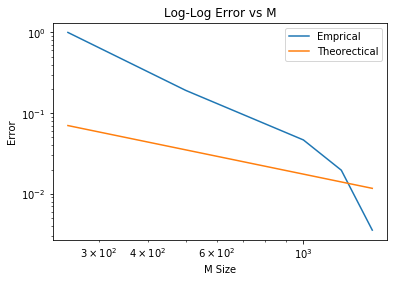

In [86]:
import math

m = [250,500,1000,1250,1500]
error_list = []
final_error_list = []
for data in m:
    for x in range(100):
        problem3 = theory(data)
        error = problem3.draw()
        if error is None:
            error = 0
        error_list.append(error)
        
    #add the 95th error to the final list
    a = sorted(error_list)
    final_error_list.append(a[94])
    
print(final_error_list)

theoretical = []
for data in m:
    theoretical.append(4*math.log((4/0.05))/data) 

print(m)
plt.loglog(m, final_error_list)
plt.loglog(m, theoretical)
plt.title("Log-Log Error vs M")
plt.xlabel("M Size")
plt.ylabel("Error")
plt.legend(["Emprical","Theorectical"])
plt.show()

I created **H** depending on the amount of points inside Concept **C**. Since 250 points with float coordinates have a higher possibility of being outside the rectangle, I often noticed that I cannot create **H** if **C** did not have any points inside or I don't have enough points inside the rectangles to create an accurate error analysis. The coordinates, training points, and testing points are all float created by a uniform distribution. 

In every epoch (I only depended on 100 epochs), I would create a 1000 test points, but depending on the m size, I can noticed my error varies. For instance, I have a high error when m is either 250 or 500 , whereas when I have a 1000 m size or larger, my error would decrease greatly. Initially, my error line has a similar slope to the theoretical line, but as m grows larger, the slope decreases significantly. I believe this is due to the possible areas of error I mentioned.

I should not drop below the theoretical error, however, I believe with the high variety in creating **C** or **H** it created this inaccuracies. For example, there would be 'runs' where my rectangles are so small or large, and there are situations where I only have two points inside my rectangles, 100, or none. Below is an example of a plot with m = 250, 500, 1000 to demonsrate the inconsistencies. It is important to note that I am now plotting the testing points. I want to demonstrate how the training points are generated with the rectangles. 

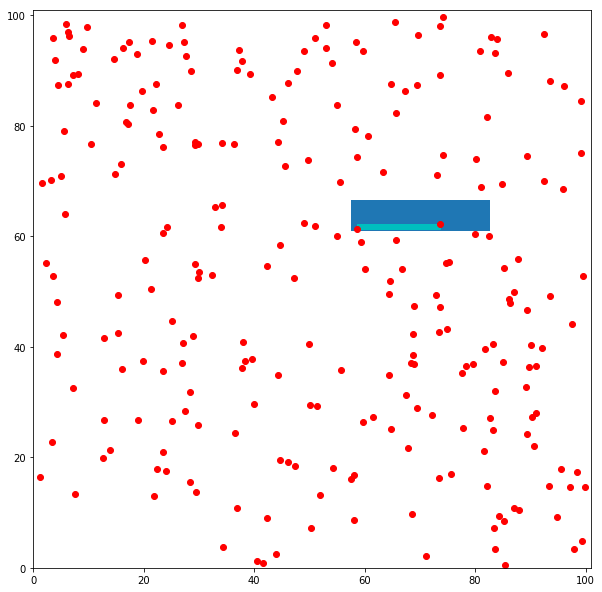

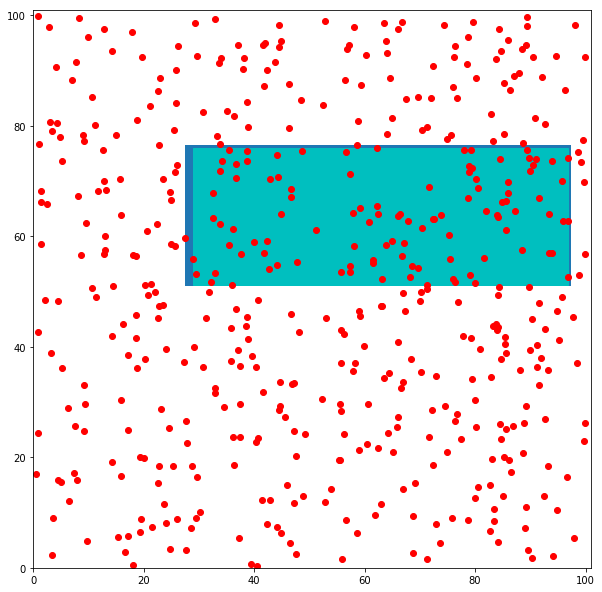

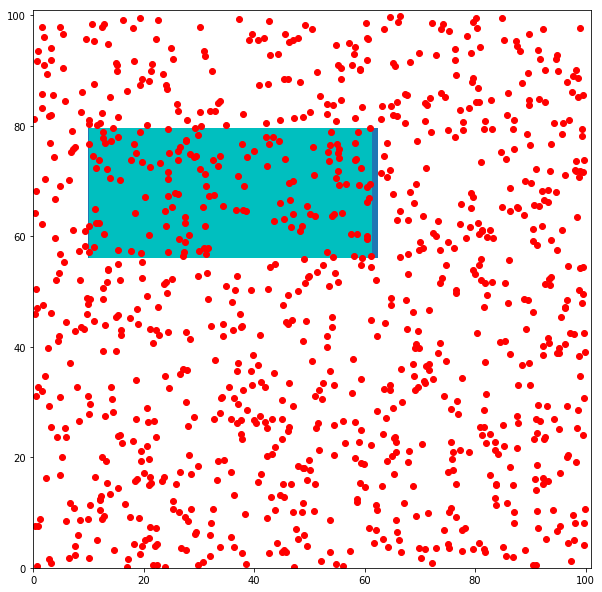

In [115]:
class theory:
    def __init__(self, m):
        self.labels = []
        self.labels2 = []
        self.predict = []
        self.training = []
        self.test = []
        self.h_graph_xcoordinates = []
        self.h_graph_ycoordinates = []
        self.m = m # this is m
        self.lims = (0, 101)

    def draw(self):
        starting_x = random.uniform(0.0,100.0) #uniform distribution
        starting_y = random.uniform(0.0,100.0) #uniform distribution
        
        width = random.uniform(0.0,100.0-starting_x) #uniform distribution
        height = random.uniform(0.0,100.0-starting_y) #uniform distribution
        
        fig1 = plt.figure(figsize=(10, 100))
        ax1 = fig1.add_subplot(111, aspect='equal')
        ax1.add_patch(patches.Rectangle((starting_x, starting_y), width, height))
        plt.ylim(self.lims)
        plt.xlim(self.lims)
        
        #genreate random floats for m x 2 vector 
        self.training = 100.0 * np.random.random_sample((self.m, 2)) #continuous uniform distribution

        #label the points
        for rows in self.training:
            x = rows[0]
            y = rows[1]
            if x >= starting_x and x <= (starting_x + width) and y >= starting_y and y<=starting_y+height:
                self.labels.append(1)
                self.h_graph_xcoordinates.append(x)
                self.h_graph_ycoordinates.append(y)
            else:
                self.labels.append(-1)
            plt.plot(x,y, 'ro')
        
        #In the case that concept c did not capture any points
        if len(self.h_graph_xcoordinates) == 0: 
            return 0
        
        #otherwise, we can create a hypothesis rectangle
        else:
            h_starting_x = min(self.h_graph_xcoordinates)
            h_starting_y = min(self.h_graph_ycoordinates)
            h_width = max(self.h_graph_xcoordinates)
            h_height = max(self.h_graph_ycoordinates)
            ax1.add_patch(patches.Rectangle((h_starting_x, h_starting_y), h_width-h_starting_x,\
                                            h_height-h_starting_y, color = 'c'))
            plt.ylim(self.lims)
            plt.xlim(self.lims)
            
            #generate a 1000 test point
            self.test = 100.0 * np.random.random_sample((1000, 2))
            
            count_c = 0
            for rows in self.test:
                x = rows[0]
                y = rows[1]
                if x >= starting_x and x <= (starting_x+width) and y >= starting_y and y<=(starting_y+height):
                    self.labels2.append(1)
                    count_c += 1
                else:
                    self.labels2.append(-1)
            
            count_h = 0
            for rows in self.test:
                x = rows[0]
                y = rows[1]
                if x >= h_starting_x and x <= h_width and y >= h_starting_y and y<=h_height:
                    self.predict.append(1)
                    count_h += 1
                else:
                    self.predict.append(-1)
                
            if count_c != 0:
                return (1-count_h/count_c)
            else:
                return 0
            
m = [250,500,1000]
error_list = []
final_error_list = []
for data in m:
    problem3 = theory(data)
    error = problem3.draw()

**Part C**: Repeat **Part B** where the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the normal distribution with mean $\mu = 50$ and standard deviation $\sigma = 25$. Again, overlay the theoretical PAC bound on your graph and discuss your results. Do you expect to observe very different results than those observed in **Part B**?  

[0.8235294117647058, 0.046511627906976716, 0.02083333333333337, 0.009316770186335366, 0.006535947712418277]
[250, 500, 1000, 1250, 1500]


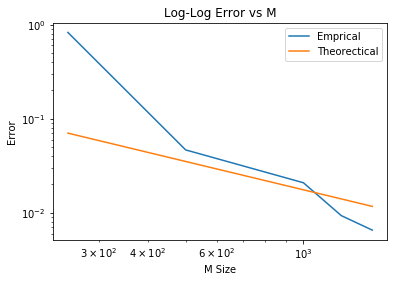

In [124]:
class theory2:
    def __init__(self, m):
        self.labels = []
        self.labels2 = []
        self.predict = []
        self.training = []
        self.test = []
        self.h_graph_xcoordinates = []
        self.h_graph_ycoordinates = []
        self.m = m # this is m
        self.lims = (0, 101)

    def draw(self):
        mean = [50, 50]
        cov = [[25, 0], [0, 25]] 
        x,y = np.random.multivariate_normal(mean, cov, 1).T
        for i in range(1):
            starting_x = x[0]
            starting_y = y[0]
        
        width = random.uniform(0.0,100.0-starting_x) #uniform distribution
        height = random.uniform(0.0,100.0-starting_y) #uniform distribution
            
        fig1 = plt.figure(figsize=(10, 100))
        ax1 = fig1.add_subplot(111, aspect='equal')
        ax1.add_patch(patches.Rectangle((starting_x, starting_y), width, height))
        plt.ylim(self.lims)
        plt.xlim(self.lims)
        
        #genreate random floats for m x 2 vector , normal distribution
        self.training = [[0 for col in range(2)] for row in range(self.m)]
        x,y = np.random.multivariate_normal(mean, cov, self.m).T
        for i in range(self.m):
            self.training[i][0] = x[i]
            self.training[i][1] = y[i]
        
        #label the points
        for rows in self.training:
            x = rows[0]
            y = rows[1]
            if x >= starting_x and x <= (starting_x + width) and y >= starting_y and y<=starting_y+height:
                self.labels.append(1)
                self.h_graph_xcoordinates.append(x)
                self.h_graph_ycoordinates.append(y)
            else:
                self.labels.append(-1)
            plt.plot(x,y, 'ro')
        #In the case that concept c did not capture any points
        if len(self.h_graph_xcoordinates) == 0: 
            plt.close()
            return 0
        
        #otherwise, we can create a hypothesis rectangle
        else:
            h_starting_x = min(self.h_graph_xcoordinates)
            h_starting_y = min(self.h_graph_ycoordinates)
            h_width = max(self.h_graph_xcoordinates)
            h_height = max(self.h_graph_ycoordinates)
            ax1.add_patch(patches.Rectangle((h_starting_x, h_starting_y), h_width-h_starting_x,\
                                            h_height-h_starting_y, color = 'c'))
            plt.ylim(self.lims)
            plt.xlim(self.lims)
            
            #generate a 1000 test point
            self.test = [[0 for col in range(2)] for row in range(1000)]
            x,y = np.random.multivariate_normal(mean, cov, 1000).T
            for i in range(1000):
                self.test[i][0] = x[i]
                self.test[i][1] = y[i]
            
            count_c = 0
            for rows in self.test:
                x = rows[0]
                y = rows[1]
                if x >= starting_x and x <= (starting_x+width) and y >= starting_y and y<=(starting_y+height):
                    self.labels2.append(1)
                    count_c += 1
                else:
                    self.labels2.append(-1)
            
            count_h = 0
            for rows in self.test:
                x = rows[0]
                y = rows[1]
                if x >= h_starting_x and x <= h_width and y >= h_starting_y and y<=h_height:
                    self.predict.append(1)
                    count_h += 1
                else:
                    self.predict.append(-1)
                    
            plt.close()
            if count_c != 0:
                return (1-count_h/count_c)
            else:
                return 0

import math

m = [250,500,1000,1250,1500]
error_list = []
final_error_list = []
for data in m:
    for x in range(100):
        problem3 = theory2(data)
        error = problem3.draw()
        if error is None:
            error = 0
        error_list.append(error)
        
    #add the 95th error to the final list
    a = sorted(error_list)
    final_error_list.append(a[94])
    
print(final_error_list)

theoretical = []
for data in m:
    theoretical.append(4*math.log((4/0.05))/data) 

print(m)
plt.loglog(m, final_error_list)
plt.loglog(m, theoretical)
plt.title("Log-Log Error vs M")
plt.xlabel("M Size")
plt.ylabel("Error")
plt.legend(["Emprical","Theorectical"])
plt.show()

The results here are more accurate. I noticed that most of my points are generated between $40\leq $x$ \leq 60$, same goes for y, and this applies to the training points and testing points. I still fall under the theoretical error for m sizes that are greater than 1000. The 'width' and 'height' of the rectangle is generated by a uniform distribution without changing the std. deviation or mean. The reason behind this is to avoid creating end coordinates of the rectangle that are likely to be between $40\leq $x$ \leq 60$ with each epoch. This would result in a much smaller rectangle and skew the accuracy further.

The normal distribution with the parameters given in the problem resulted in a more accurate analysis, but due to using float numbers for both the x and y cooridnates of the rectangles and the feature points, it still resulted in a high possibility of having few points to conduct an error analysis, which is reduced in part C.

Additionally, while it may not be possible to achieve a -1 slope as the theory line shows, I my approach should be similar or close to -1. It is far from that due to the possible areas of inaccuracies and errors resulted from the random generators.

One way to generate more accurate results is to test with higher m values, for example, atleast 2000 and ranging until 30,000.

Theoretically speaking, I should not fall below the theoretical line, but I believe due to the inconsistencies that I mentioned, it led to this issue. Yet, to shed light on how part C is more accurate than part B, it is important to note how the points are distributed in plots with m sizes 250, 500, 1000 to compare to Part B. It is important to note that I am now plotting the testing points. I want to demonstrate how the training points are generated with the rectangles. 



0.16666666666666663
0.265625
0.5


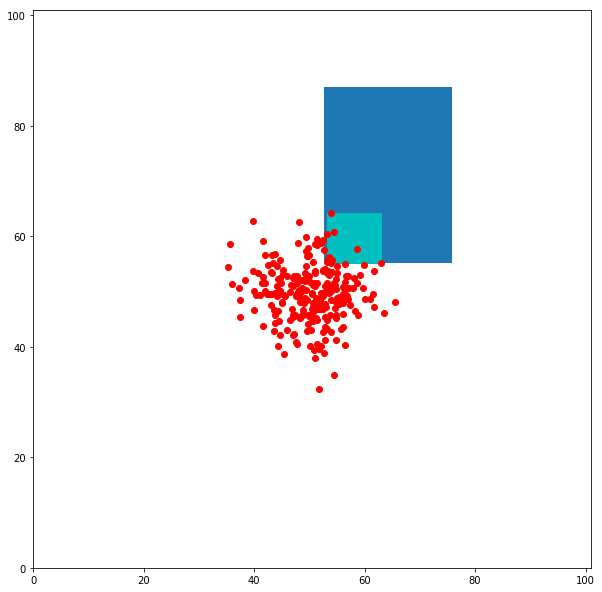

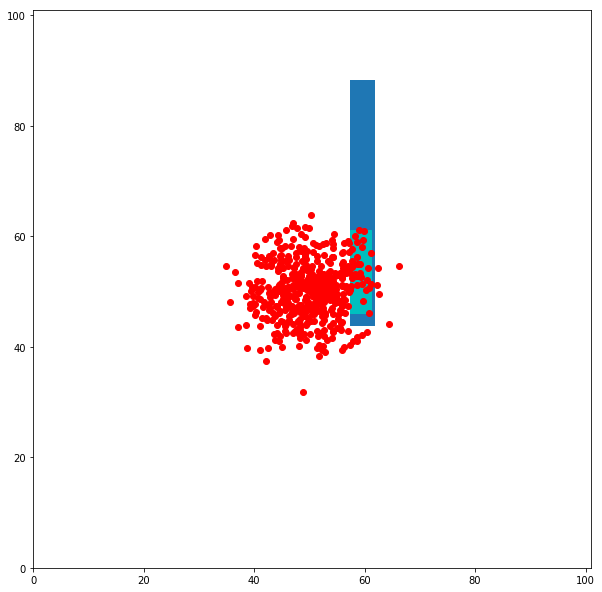

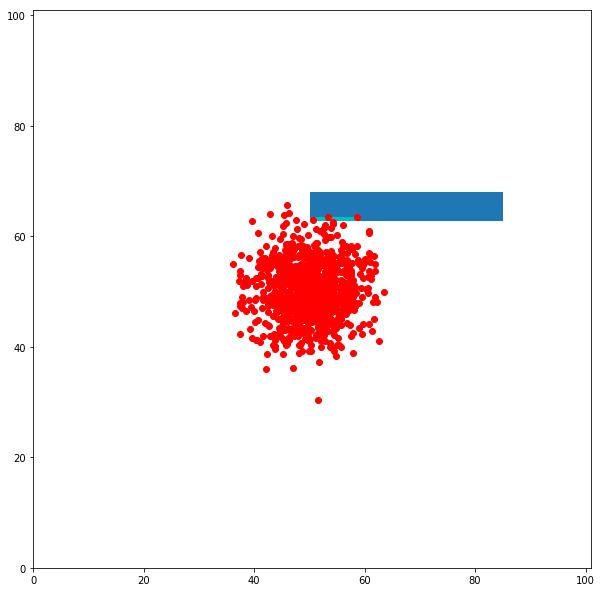

In [123]:
class theory2:
    def __init__(self, m):
        self.labels = []
        self.labels2 = []
        self.predict = []
        self.training = []
        self.test = []
        self.h_graph_xcoordinates = []
        self.h_graph_ycoordinates = []
        self.m = m # this is m
        self.lims = (0, 101)

    def draw(self):
        mean = [50, 50]
        cov = [[25, 0], [0, 25]] 
        x,y = np.random.multivariate_normal(mean, cov, 1).T
        for i in range(1):
            starting_x = x[0]
            starting_y = y[0]
        
        width = random.uniform(0.0,100.0-starting_x) #uniform distribution
        height = random.uniform(0.0,100.0-starting_y) #uniform distribution
            
        fig1 = plt.figure(figsize=(10, 100))
        ax1 = fig1.add_subplot(111, aspect='equal')
        ax1.add_patch(patches.Rectangle((starting_x, starting_y), width, height))
        plt.ylim(self.lims)
        plt.xlim(self.lims)
        
        #genreate random floats for m x 2 vector , normal distribution
        self.training = [[0 for col in range(2)] for row in range(self.m)]
        x,y = np.random.multivariate_normal(mean, cov, self.m).T
        for i in range(self.m):
            self.training[i][0] = x[i]
            self.training[i][1] = y[i]
        
        #label the points
        for rows in self.training:
            x = rows[0]
            y = rows[1]
            if x >= starting_x and x <= (starting_x + width) and y >= starting_y and y<=(starting_y+height):
                self.labels.append(1)
                self.h_graph_xcoordinates.append(x)
                self.h_graph_ycoordinates.append(y)
            else:
                self.labels.append(-1)
            plt.plot(x,y, 'ro')
        #In the case that concept c did not capture any points
        if len(self.h_graph_xcoordinates) == 0: 
            return 0
        
        #otherwise, we can create a hypothesis rectangle
        else:
            h_starting_x = min(self.h_graph_xcoordinates)
            h_starting_y = min(self.h_graph_ycoordinates)
            h_width = max(self.h_graph_xcoordinates)
            h_height = max(self.h_graph_ycoordinates)
            ax1.add_patch(patches.Rectangle((h_starting_x, h_starting_y), h_width-h_starting_x,\
                                            h_height-h_starting_y, color = 'c'))
            plt.ylim(self.lims)
            plt.xlim(self.lims)
            
            #generate a 1000 test point
            self.test = [[0 for col in range(2)] for row in range(1000)]
            x,y = np.random.multivariate_normal(mean, cov, 1000).T
            for i in range(1000):
                self.test[i][0] = x[i]
                self.test[i][1] = y[i]
            
            count_c = 0
            for rows in self.test:
                x = rows[0]
                y = rows[1]
                if x >= starting_x and x <= (starting_x+width) and y >= starting_y and y<=(starting_y+height):
                    self.labels2.append(1)
                    count_c += 1
                else:
                    self.labels2.append(-1)
            
            count_h = 0
            for rows in self.test:
                x = rows[0]
                y = rows[1]
                if x >= h_starting_x and x <= h_width and y >= h_starting_y and y<=h_height:
                    self.predict.append(1)
                    count_h += 1
                else:
                    self.predict.append(-1)
                
            if count_c != 0:
                return (1-count_h/count_c)
            else:
                return 0

import math

m = [250,500,1000]
error_list = []
final_error_list = []
for data in m:
    for x in range(1):
        problem3 = theory2(data)
        error = problem3.draw()
        print(error)